In [19]:
from numpy import array
import nistrng
from CustomGenerator.rng import g1RandomNumberGenerator

In [2]:
tests = [
    "monobit",
    "frequency_within_block",
    "runs",
    "longest_run_ones_in_a_block",
    "binary_matrix_rank",
    "dft",
    "non_overlapping_template_matching",
    "overlapping_template_matching",
    "maurers_universal",
    "linear_complexity",
    "serial",
    "approximate_entropy",
    "cumulative sums",
    "random_excursion",
    "random_excursion_variant"
]

In [24]:
def get_array(bits):
    bits_list = [int(b) for b in bits]
    return array(bits_list)

In [25]:
get_array('10101')

array([1, 0, 1, 0, 1])

In [26]:
def run_tests(key, battery = nistrng.SP800_22R1A_BATTERY):
    for test_name in tests:
        test_result = nistrng.run_by_name_battery(test_name, get_array(key), battery)
        print(f"\n==================== {test_name} ====================")
        if test_result is not None:
            result_obj, elapsed_time = test_result
            print(f"Elapsed time: {elapsed_time:.4f}s")
            print(f"Passed: {result_obj.passed}")
            print(f"P-value (score): {result_obj.score}")
            print(f"Test name: {result_obj.name}")
        else:
            print("Test not eligible or failed eligibility check")

In [7]:
customKey = g1RandomNumberGenerator(128)

In [28]:
customKey

'000100101011000000010100000011011110110100101100110011111101100010110000001111010000100011110000000010011111000000001010000011111100111101101000100010010001000101001000000110000100100111100111010010101110011101001011100100000011000000011010011010000000100001101001111011110110101011110111011000110000100010001000000111011001000011010000000101011111001010010010001011110100101101101000100010110001011011110000010110000111010111100011111100101010011101100011110100000011000000010001111100000000100001110101111011111111001011110111011100111101100000010001000100000101000011010000010100011111001001010010001011111111000110001000001010010001001110010000101100000001010111110100100100100100111111000011011110000011000000010000010110000001100001011001111001110101101011100111110001110011000000101001000011010011000001011000001100001110001100110000101001111110101100001000100100000011110110110000110110000011010111100010101100100010011111010011101100000000100100010110100010000101100000001101111000111000101

In [27]:
run_tests(customKey)


==================== monobit ====================
Elapsed time: 0.0000s
Passed: False
P-value (score): 0.0001768345704016081
Test name: Monobit

==================== frequency_within_block ====================
Elapsed time: 0.0000s
Passed: False
P-value (score): 5.268310034857249e-05
Test name: Frequency Within Block

==================== runs ====================
Elapsed time: 0.0000s
Passed: False
P-value (score): 0.007824034942148386
Test name: Runs

==================== longest_run_ones_in_a_block ====================
Elapsed time: 0.0000s
Passed: True
P-value (score): 0.023688036619446535
Test name: Longest Run Ones In A Block

==================== binary_matrix_rank ====================
Test not eligible or failed eligibility check

==================== dft ====================
Elapsed time: 1.0000s
Passed: False
P-value (score): 0.0010786187068240816
Test name: Discrete Fourier Transform

==================== non_overlapping_template_matching ====================
Elapsed time: 

# Testando o gerador Rule-30

In [1]:
from generators.rule30_gen.rule30 import Rule30Generator

In [2]:
rule_30_gen = Rule30Generator()

In [3]:
bytes = rule_30_gen.generate_bytes(128)
print(bytes.dtype, bytes.size, bytes)

int64 1024 [1 1 1 ... 1 1 1]


# Testando Quantum

In [1]:
from generators.quantumrandom.quantum import QuantumGenerator

In [2]:
qt_gen = QuantumGenerator()

In [3]:
qt_gen._generate_byte()

HTTPError: HTTP Error 500: Internal Server Error

# Testando JSON-RPC

In [4]:
from generators.json_rpc.json_rpc_gen import JSONRPCGenerator

In [9]:
json_gen = JSONRPCGenerator()

In [14]:
bytes = json_gen.generate_bytes(5)
print(bytes.size, bytes)

40 [0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 0 1]


# Testando o testador

In [4]:
from tests.nist_tests import NIST_tester

In [5]:
tester = NIST_tester()

In [6]:
results = tester.run_battery_tests(bytes)

In [7]:
results

 None,
 None,
 None,
 None,

In [8]:
stat_res = tester.run_statistic_tests(rule_30_gen)

In [9]:
stat_res.get_name()

'Rule30Generator'

In [10]:
stat_res.get_pass_count()

{'monobit': 4,
 'frequency_within_block': 32,
 'runs': 10,
 'longest_run_ones_in_a_block': 76,
 'binary_matrix_rank': 0,
 'dft': 97,
 'non_overlapping_template_matching': 96,
 'overlapping_template_matching': 0,
 'maurers_universal': 0,
 'linear_complexity': 0,
 'serial': 2,
 'approximate_entropy': 3,
 'cumulative sums': 4,
 'random_excursion': 26,
 'random_excursion_variant': 34}

In [11]:
stat_res.get_mean_score()

{'monobit': 0.0009899539447666725,
 'frequency_within_block': 0.11683032915767973,
 'runs': 0.364835857010563,
 'longest_run_ones_in_a_block': 0.1604288716894779,
 'binary_matrix_rank': 0,
 'dft': 0.4978584408815555,
 'non_overlapping_template_matching': 0.672275223750745,
 'overlapping_template_matching': 0,
 'maurers_universal': 0,
 'linear_complexity': 0,
 'serial': 0.06550665888947456,
 'approximate_entropy': 0.0013517374698658383,
 'cumulative sums': 0.0015253565787940882,
 'random_excursion': 0.5180960756647206,
 'random_excursion_variant': 0.34972215028565423}

In [12]:
stat_res.get_eligible_count()

{'monobit': 100,
 'frequency_within_block': 100,
 'runs': 11,
 'longest_run_ones_in_a_block': 100,
 'binary_matrix_rank': 0,
 'dft': 100,
 'non_overlapping_template_matching': 100,
 'overlapping_template_matching': 0,
 'maurers_universal': 0,
 'linear_complexity': 0,
 'serial': 100,
 'approximate_entropy': 100,
 'cumulative sums': 100,
 'random_excursion': 100,
 'random_excursion_variant': 100}

# Testando o TestVisualizer

In [13]:
from tests.visualization import TestVisualizer

In [14]:
visualizer = TestVisualizer(stat_res)

In [15]:
names, passed, scores, eligible = visualizer._get_grouped_stats()

In [16]:
names

['Rule30Generator']

In [17]:
visualizer._get_all_test_stats(passed)

{'monobit': [4],
 'frequency_within_block': [32],
 'runs': [10],
 'longest_run_ones_in_a_block': [76],
 'binary_matrix_rank': [0],
 'dft': [97],
 'non_overlapping_template_matching': [96],
 'overlapping_template_matching': [0],
 'maurers_universal': [0],
 'linear_complexity': [0],
 'serial': [2],
 'approximate_entropy': [3],
 'cumulative sums': [4],
 'random_excursion': [26],
 'random_excursion_variant': [34]}

FileNotFoundError: [Errno 2] No such file or directory: 'results/passed_comparison.png'

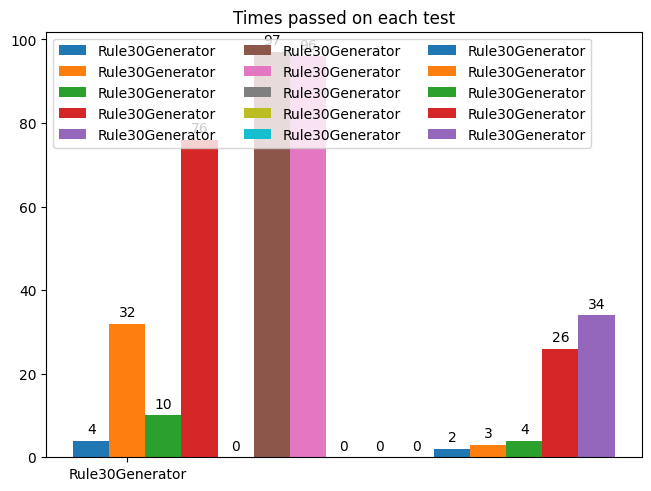

In [18]:
visualizer.show_compared_stats("passed")

# Testando o G1

In [3]:
from generators.CustomGenerator.rng import g1RandomNumberGenerator

In [4]:
g1_gen = g1RandomNumberGenerator()

In [5]:
g1_bytes = g1_gen.generate_bytes(128)

In [6]:
g1_bytes

array([1, 1, 1, ..., 1, 1, 0], shape=(1024,))

In [7]:
g1_res = tester.run_battery_tests(g1_bytes)

In [8]:
for res in g1_res:
    if res is not None:
        print(res.name, res.passed, res.score)

Monobit True 0.5319710580974011
Frequency Within Block True 0.9928672858366374
Runs False 0.0002741294582309145
Longest Run Ones In A Block True 0.2055347116269819
Discrete Fourier Transform True 0.688068575192731
Non Overlapping Template Matching True 0.9919017720388966
Serial False 0.01607895989088056
Approximate Entropy False 1.9245926829495589e-07
Cumulative Sums True 0.7561675712479916
Random Excursion False 0.39068709992902906
Random Excursion Variant True 0.42788680473875035


In [9]:
g1_stat_res = tester.run_statistic_tests(g1_gen, 5)

In [10]:
g1_stat_res.get_eligible_count()

{'monobit': 5,
 'frequency_within_block': 5,
 'runs': 3,
 'longest_run_ones_in_a_block': 5,
 'binary_matrix_rank': 0,
 'dft': 5,
 'non_overlapping_template_matching': 5,
 'overlapping_template_matching': 0,
 'maurers_universal': 0,
 'linear_complexity': 0,
 'serial': 5,
 'approximate_entropy': 5,
 'cumulative sums': 5,
 'random_excursion': 5,
 'random_excursion_variant': 5}

In [11]:
g1_stat_res.get_mean_score()

{'monobit': 0.30971955847157595,
 'frequency_within_block': 0.624956147346465,
 'runs': 0.3782406193208969,
 'longest_run_ones_in_a_block': 0.11897655021272921,
 'binary_matrix_rank': 0,
 'dft': 0.29484602471406,
 'non_overlapping_template_matching': 0.5896209666502085,
 'overlapping_template_matching': 0,
 'maurers_universal': 0,
 'linear_complexity': 0,
 'serial': 0.07605650623636945,
 'approximate_entropy': 0.020256853201315116,
 'cumulative sums': 0.34435305627222723,
 'random_excursion': 0.33365609270674024,
 'random_excursion_variant': 0.531004200042642}

In [12]:
g1_stat_res.get_pass_count()

{'monobit': 3,
 'frequency_within_block': 4,
 'runs': 3,
 'longest_run_ones_in_a_block': 4,
 'binary_matrix_rank': 0,
 'dft': 3,
 'non_overlapping_template_matching': 4,
 'overlapping_template_matching': 0,
 'maurers_universal': 0,
 'linear_complexity': 0,
 'serial': 1,
 'approximate_entropy': 2,
 'cumulative sums': 3,
 'random_excursion': 1,
 'random_excursion_variant': 4}